In [1]:
from typing import List, Dict, Union, Callable, Tuple

import numpy as np
import pandas as pd
from IPython.core.display_functions import clear_output

from experiments.common import (
    plot_stats,
    run_increasing_bandwidth_experiments,
    ExperimentConfig,
)
from experiments.data.synthetic_benchmarks import (
    benchmark_curve_1,
    benchmark_curve_2,
    benchmark_curve_3,
)

%load_ext autoreload
%autoreload 2

In [2]:
noise_ratio: float = 0.3
num_points: int = 100

# RMSE for different values of predictor's bandwidth used in joint KDE
## Summary
The results demonstrate there exists a failry consistent inverse relationship between the optimal bandwidth and the number of points used for local estimation. Additional work need to be done to explore robust automatic optimal bandwidth estimation in this respect.

## Curve 1

In [3]:
def run_experiment(
    curve: Callable[[float, bool], Tuple[np.ndarray, np.ndarray, np.ndarray]],
    size_neighborhood: int,
) -> None:
    results: List[Dict[str, Union[np.ndarray, pd.DataFrame]]]
    results = run_increasing_bandwidth_experiments(
        curve=curve,
        noise_ratio=noise_ratio,
        hetero=True,
        size_neighborhood=size_neighborhood,
        num_points=num_points,
    )
    results_stats: List[pd.DataFrame] = [r["stat"] for r in results]
    lams: List[str] = [f"{r['lam']}" if r["lam"] is not None else "}" for r in results]
    curves: List[ExperimentConfig] = [r["curve"] for r in results]

    rmse_stats: pd.DataFrame = pd.concat(
        [i["rmse"].rename(f"{l}") for i, c, l in zip(results_stats, curves, lams)],
        axis=1,
    ).astype(float)

    clear_output()

    rmse_stats.T.plot.bar(
        title=f"Curve {curve} RMSE for joint KDE predictor's bandwidth, size_neighborhood {size_neighborhood}"
    )

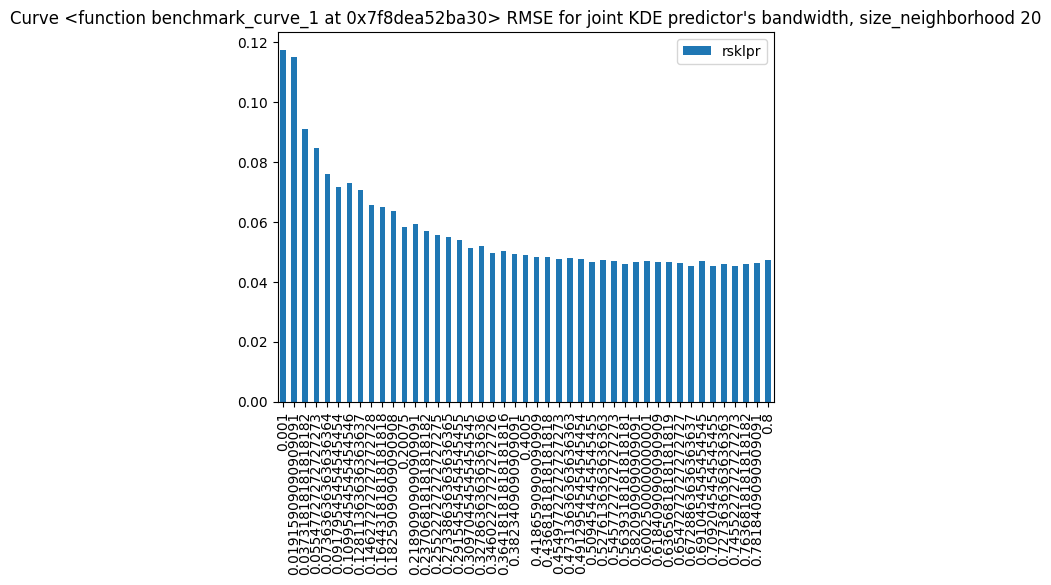

In [4]:
run_experiment(curve=benchmark_curve_1, size_neighborhood=20)

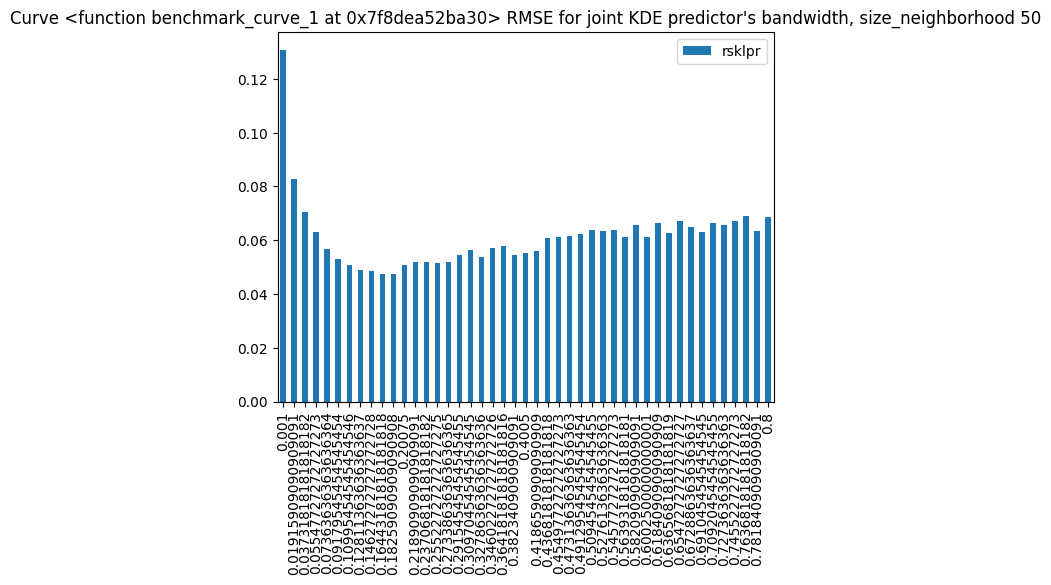

In [5]:
run_experiment(curve=benchmark_curve_1, size_neighborhood=50)

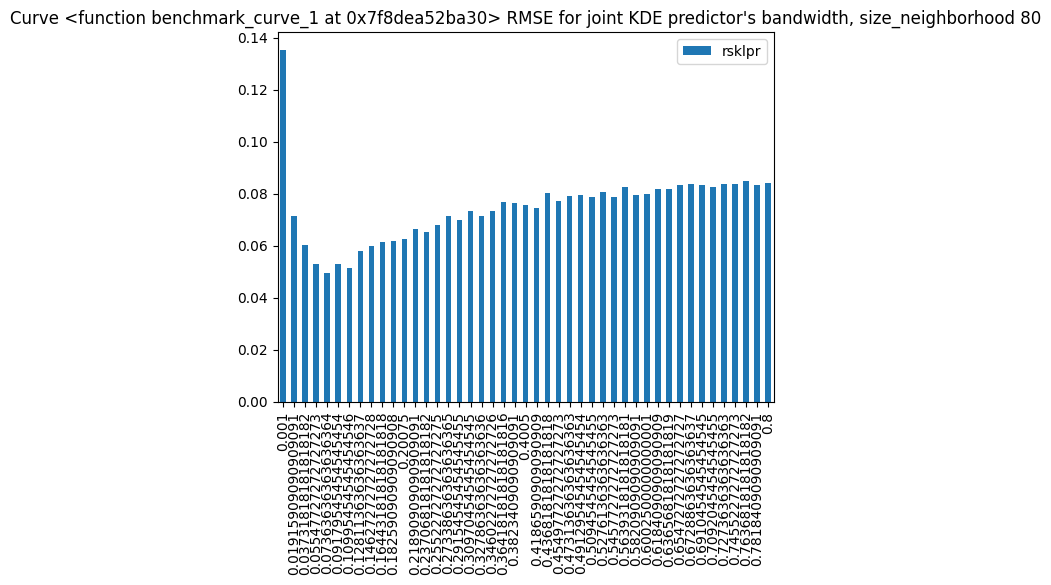

In [6]:
run_experiment(curve=benchmark_curve_1, size_neighborhood=80)

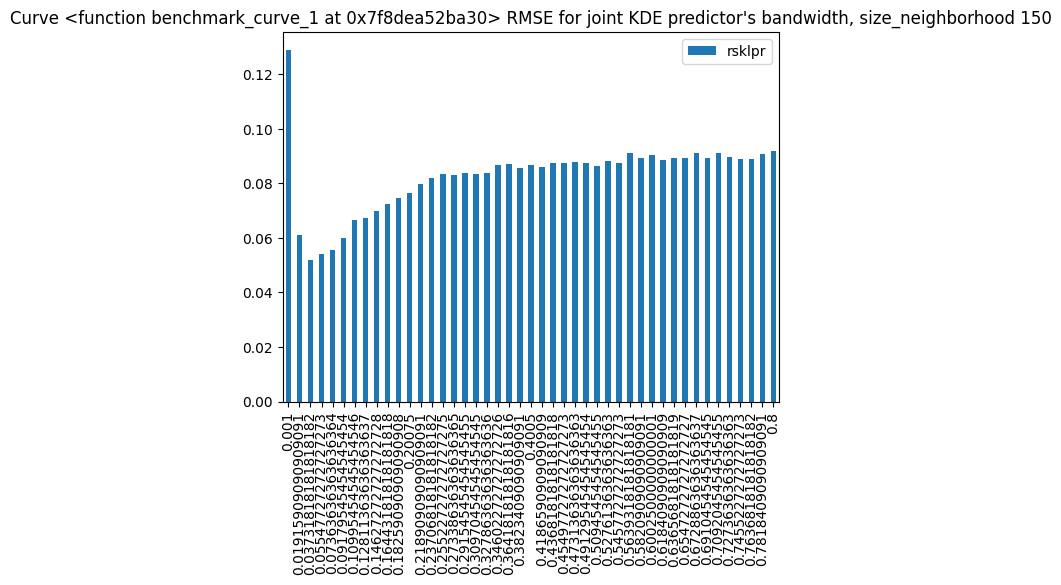

In [7]:
run_experiment(curve=benchmark_curve_1, size_neighborhood=150)

## Curve 2

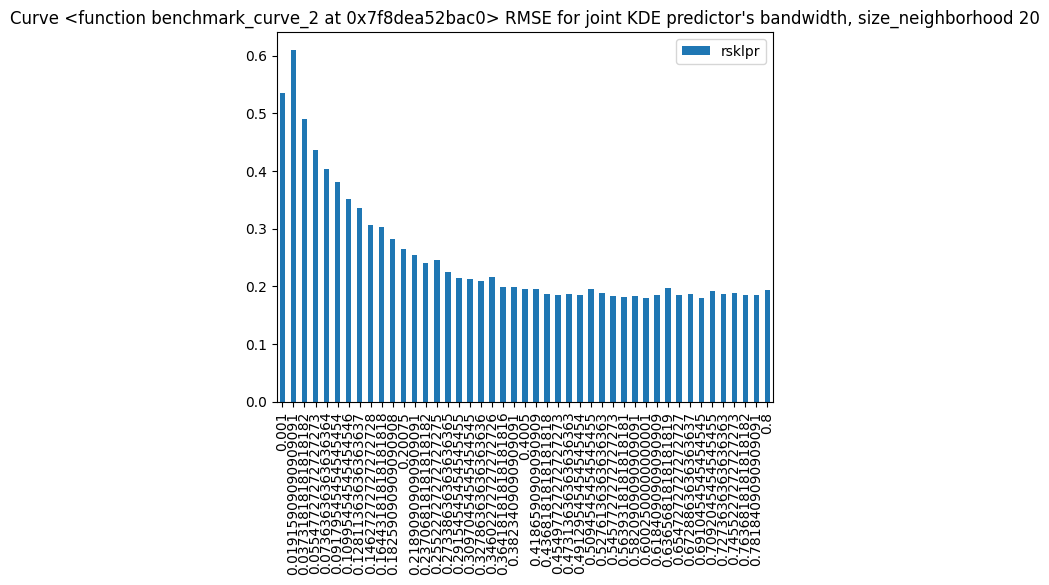

In [8]:
run_experiment(curve=benchmark_curve_2, size_neighborhood=20)

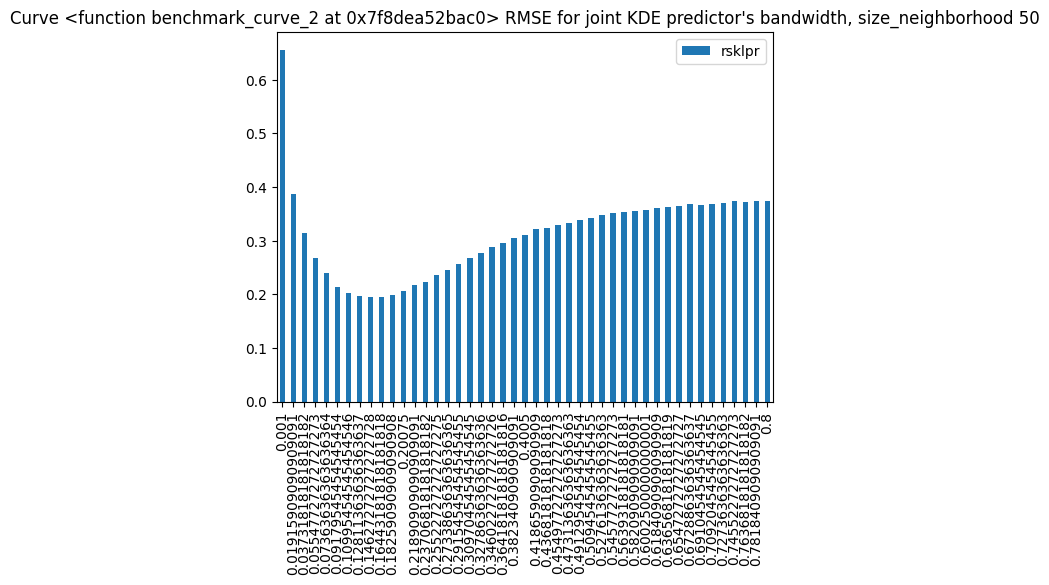

In [9]:
run_experiment(curve=benchmark_curve_2, size_neighborhood=50)

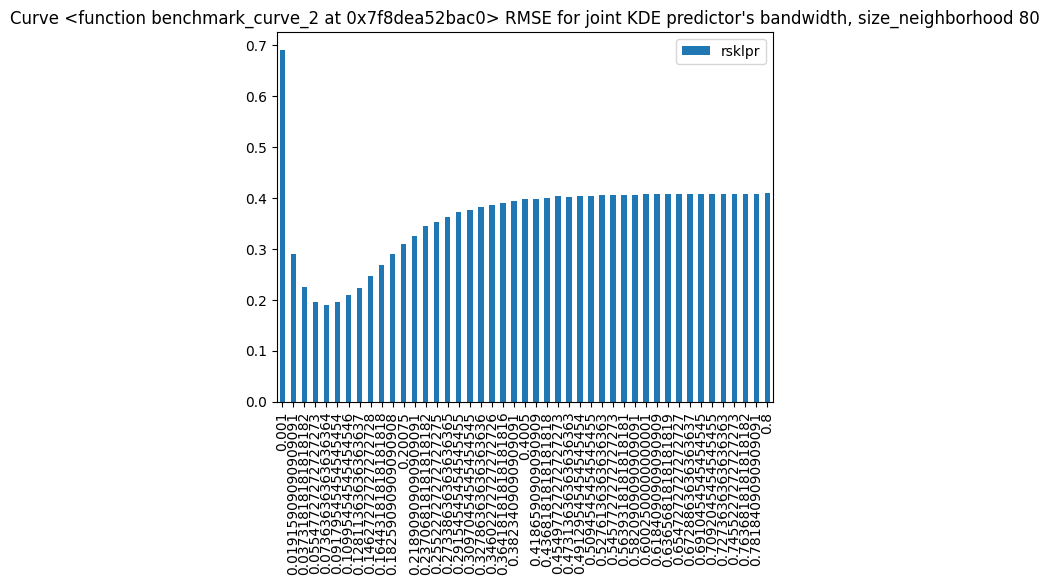

In [10]:
run_experiment(curve=benchmark_curve_2, size_neighborhood=80)

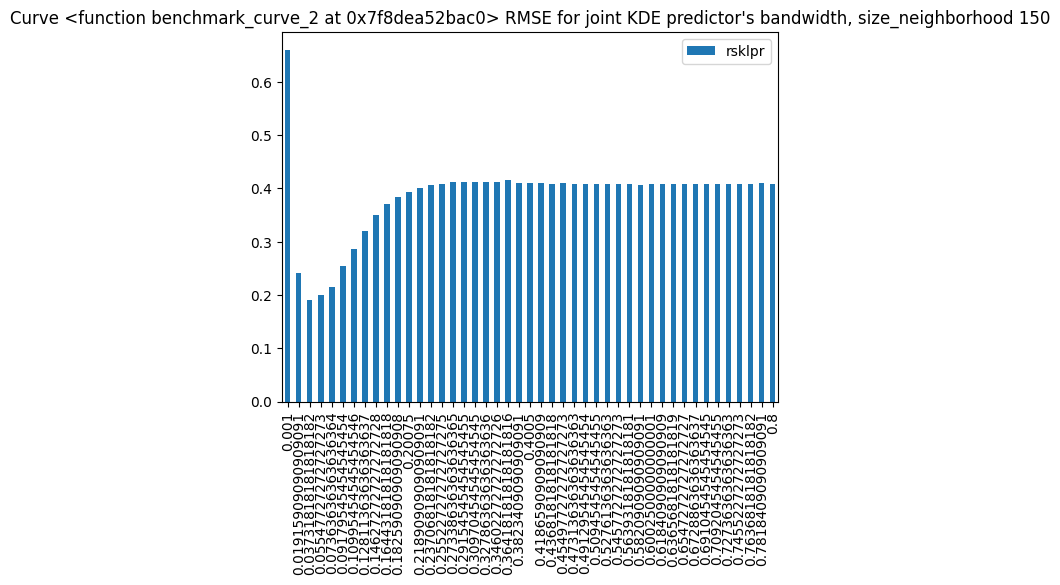

In [11]:
run_experiment(curve=benchmark_curve_2, size_neighborhood=150)

## Curve 3

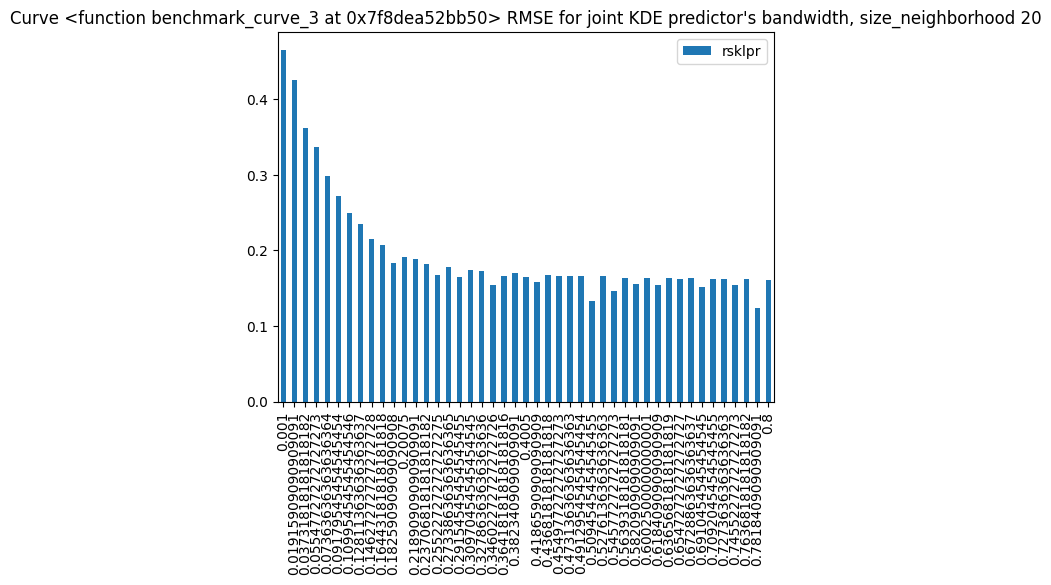

In [12]:
run_experiment(curve=benchmark_curve_3, size_neighborhood=20)

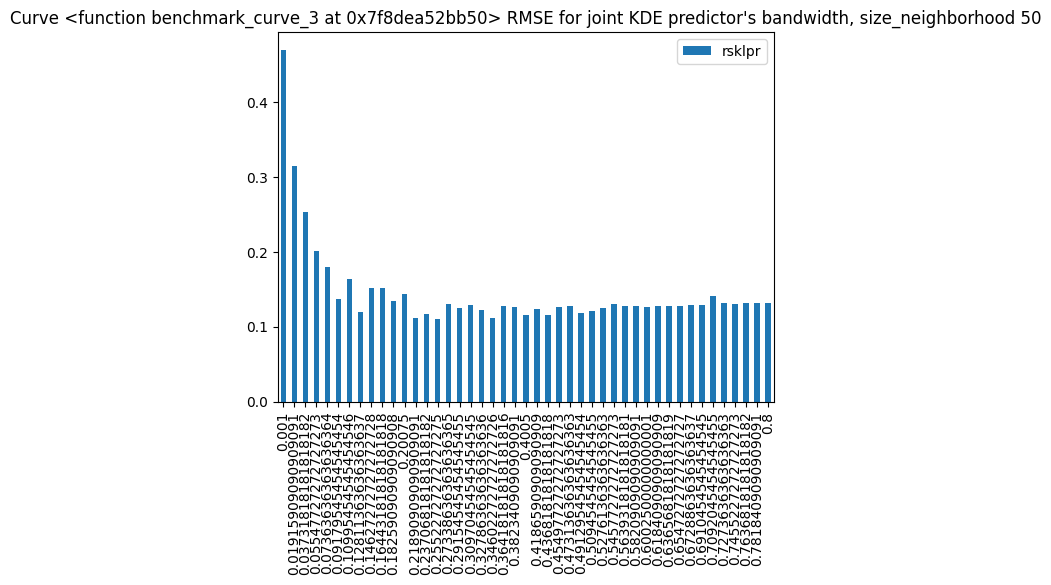

In [13]:
run_experiment(curve=benchmark_curve_3, size_neighborhood=50)

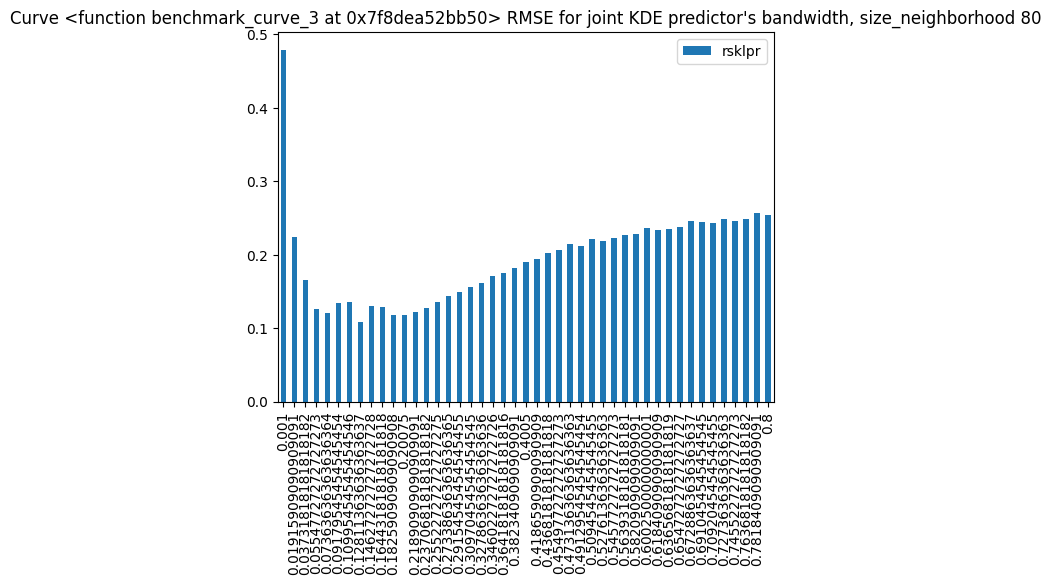

In [14]:
run_experiment(curve=benchmark_curve_3, size_neighborhood=80)

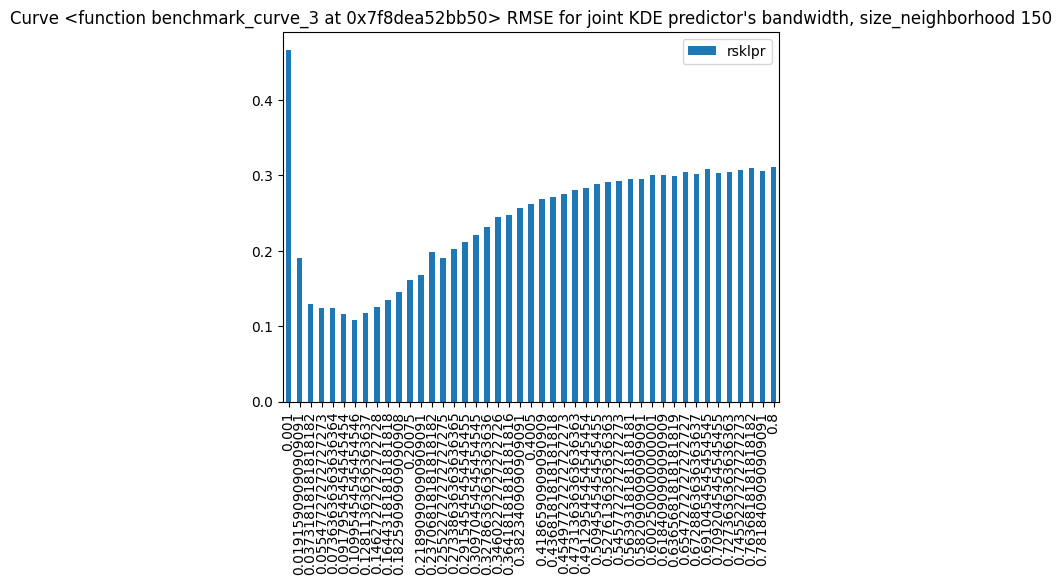

In [15]:
run_experiment(curve=benchmark_curve_3, size_neighborhood=150)